In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
#plt.style.use('dark_background')
%matplotlib inline

In [2]:
df = pd.read_parquet("data.parquet")
df

,U,Y
0,"[6.751824387155514e-08, -4.861882449671143e-08...","[1.3032289867823032e-08, -9.610685887801852e-0..."
1,"[-2.8732740835694417e-07, -1.2774112284994073e...","[-1.6949836990025463e-08, -4.7515742657905555e..."
2,"[-2.2996461492418644e-08, -7.696479883259075e-...","[-1.138599711661528e-07, -9.434625016939072e-0..."
3,"[8.971692745067848e-09, 1.671710971319099e-08,...","[-1.2386691877738704e-07, -8.965994140299156e-..."
4,"[-1.3117691417553647e-08, -5.473717572661386e-...","[-4.1639316043074664e-08, -4.528948466906665e-..."
...,...,...
80995,"[-8.589397229016753e-08, -9.244714772437398e-0...","[-1.269564311369084e-07, -3.0715028168282315e-..."
80996,"[1.3010882288413955e-08, 5.272899156717242e-09...","[-1.3868474274941554e-07, -6.398257359686753e-..."
80997,"[-4.428588086338322e-08, -1.0701157069531232e-...","[-8.297425997431503e-08, -6.940688259176398e-0..."
80998,"[2.5343395060792138e-08, 7.182578822242526e-08...","[-3.2012379687967896e-08, -6.22009164837502e-0..."


In [3]:
t = 1e3*np.arange(df.shape[0]-1000)/8000
u = np.vstack(df["U"])[1000:]
y = np.vstack(df["Y"])[1000:]

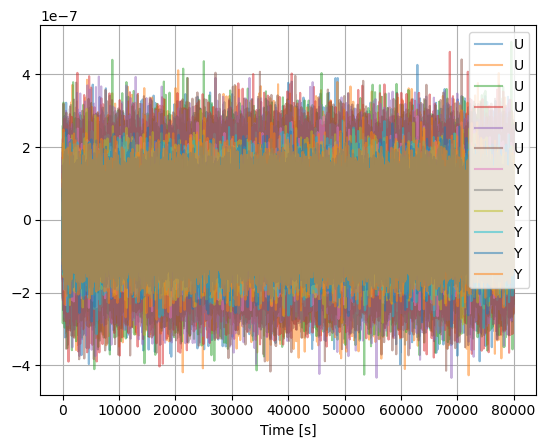

In [104]:
fig,ax = plt.subplots()
ax.plot(u,alpha=0.5,label="U")
ax.plot(y,alpha=0.5,label="Y")
ax.grid()
ax.set_xlabel('Time [s]')
ax.legend()

In [105]:
nu.shape,psd_u.shape

((1001,), (6, 1001))

In [4]:
nu,psd_u = welch(u.T,fs=8000, nperseg=1000*4)
nu,psd_y = welch(y.T,fs=8000, nperseg=1000*4)
tf_db = 10*np.log10(psd_y/psd_u).T

In [38]:

#np.savez("ASMS_TF.npz",nu=nu,tf_db=tf_db)

In [6]:
data = np.load("ASMS_TF.npz")
nu = data['nu']
tf_db = data['tf_db']

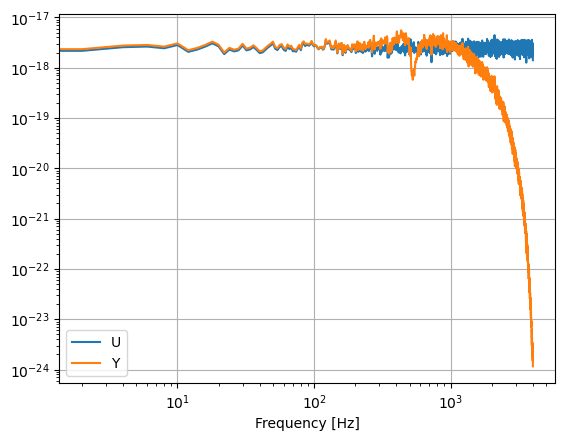

In [6]:
fig,ax = plt.subplots()
ax.loglog(nu,psd_u.T,label="U")
ax.loglog(nu,psd_y.T,label="Y")
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.legend()

In [37]:
10*np.log10(0.125)

-9.030899869919436

In [51]:
400*25e-3

10.0

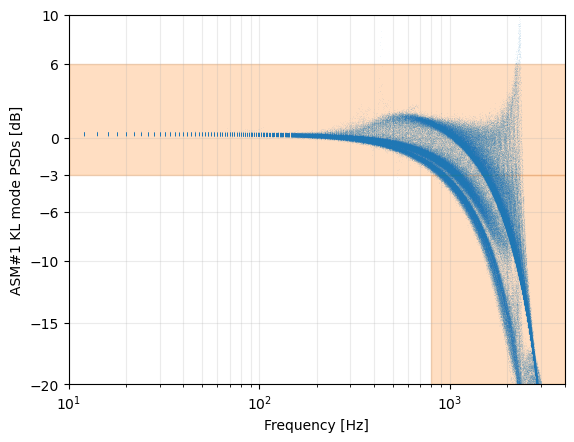

In [9]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db,"C0,",alpha=0.05)
ax.grid(which='both',alpha=0.25)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

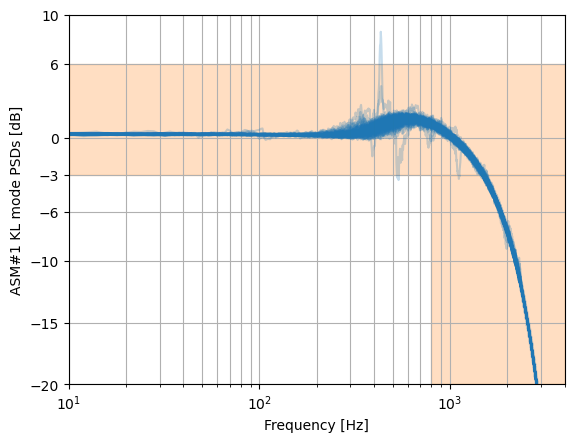

In [6]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,:66],"C0",alpha=0.25)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

In [190]:
n = 25
(n+1)*(n+2)/2

351.0

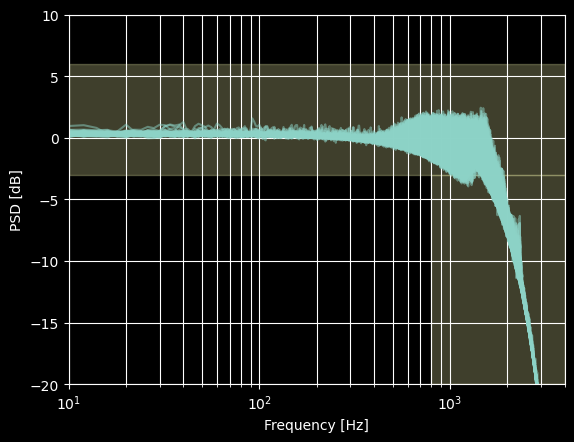

In [220]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,66:231],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

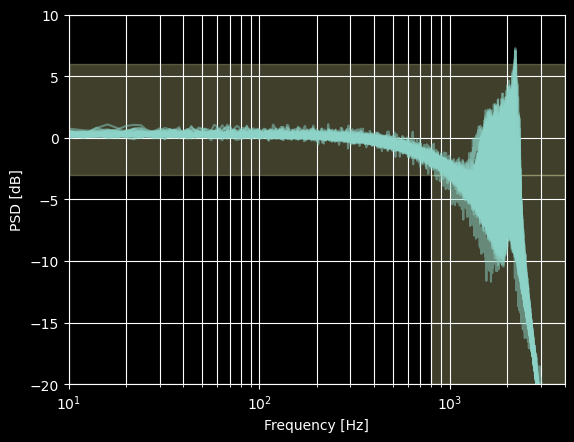

In [221]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,231:351],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

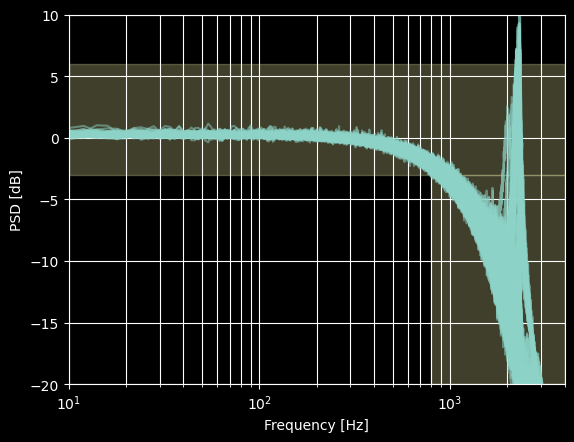

In [222]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,351:],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

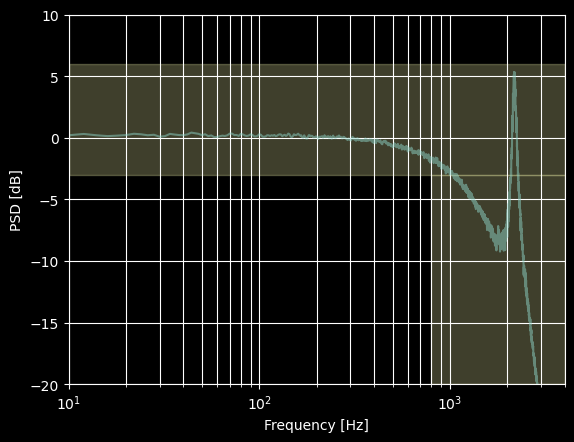

In [255]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,347],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

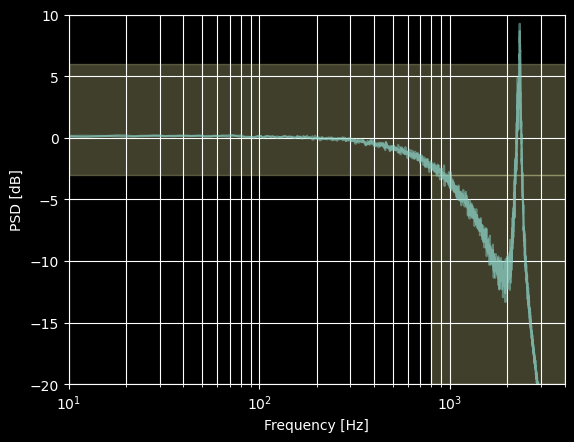

In [238]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,416:418],"C0",alpha=0.5)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
#ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

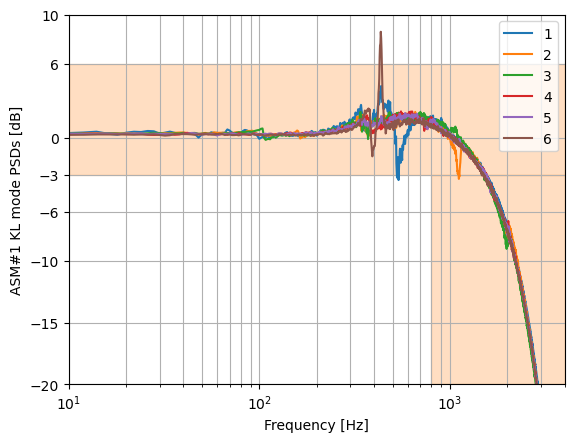

In [7]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,:6])
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend(list(range(1,tf_db.shape[0]+1)))
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

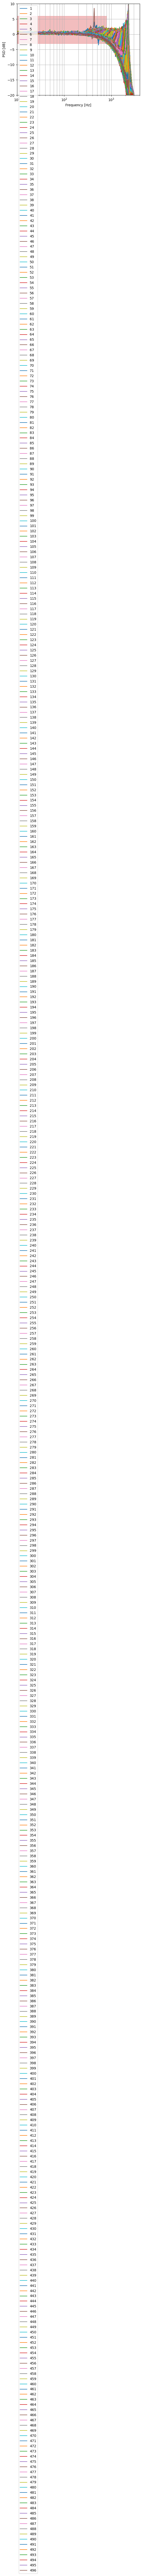

In [8]:
fig,ax = plt.subplots()
ax.semilogx(nu,10*np.log10(psd_y/psd_u).T)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend(list(range(1,psd_u.shape[0]+1)))
ax.fill_between([10,800],[-3, -3],6,color="C3",alpha=0.3)


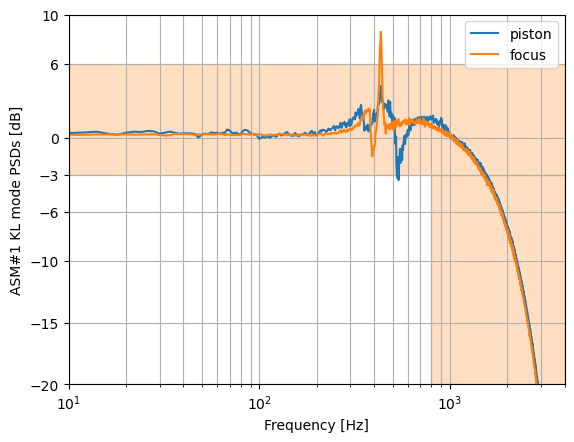

In [8]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,0],label="piston")
ax.semilogx(nu,tf_db[:,5],label="focus")
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("ASM#1 KL mode PSDs [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.legend()
ax.set_yticks([-20,-15,-10,-3,0,-6,6,10])
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

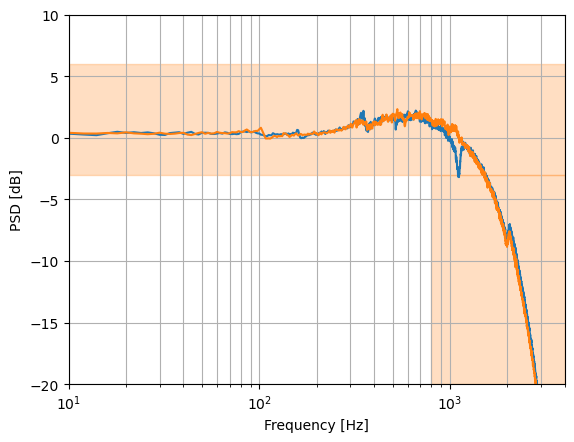

In [11]:
fig,ax = plt.subplots()
ax.semilogx(nu,tf_db[:,1])
ax.semilogx(nu,tf_db[:,2])
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])
ax.fill_between([10,4e3],[-3, -3],6,color="C1",alpha=0.25)
ax.fill_between([800,4e3],[-20, -20],-3,color="C1",alpha=0.25)

(-20.0, 10.0)

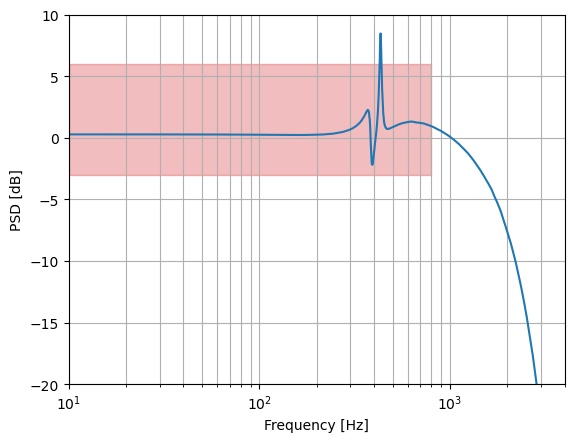

In [ ]:
fig,ax = plt.subplots()
ax.semilogx(nu,10*np.log10(psd_y/psd_u))
ax.fill_between([10,800],[-3, -3],6,color="C3",alpha=0.3)
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
ax.set_xlim([10,4e3])
ax.set_ylim([-20,10])

In [6]:
nu[1]

2.0

In [30]:
8000/2000

4.0

In [115]:
80000/2000

40.0

In [121]:
18**2/2,17*18/2

(162.0, 153.0)

In [126]:
8*9/2

36.0

In [13]:
nu[np.argmax(tf_db[:,5])]

434.0